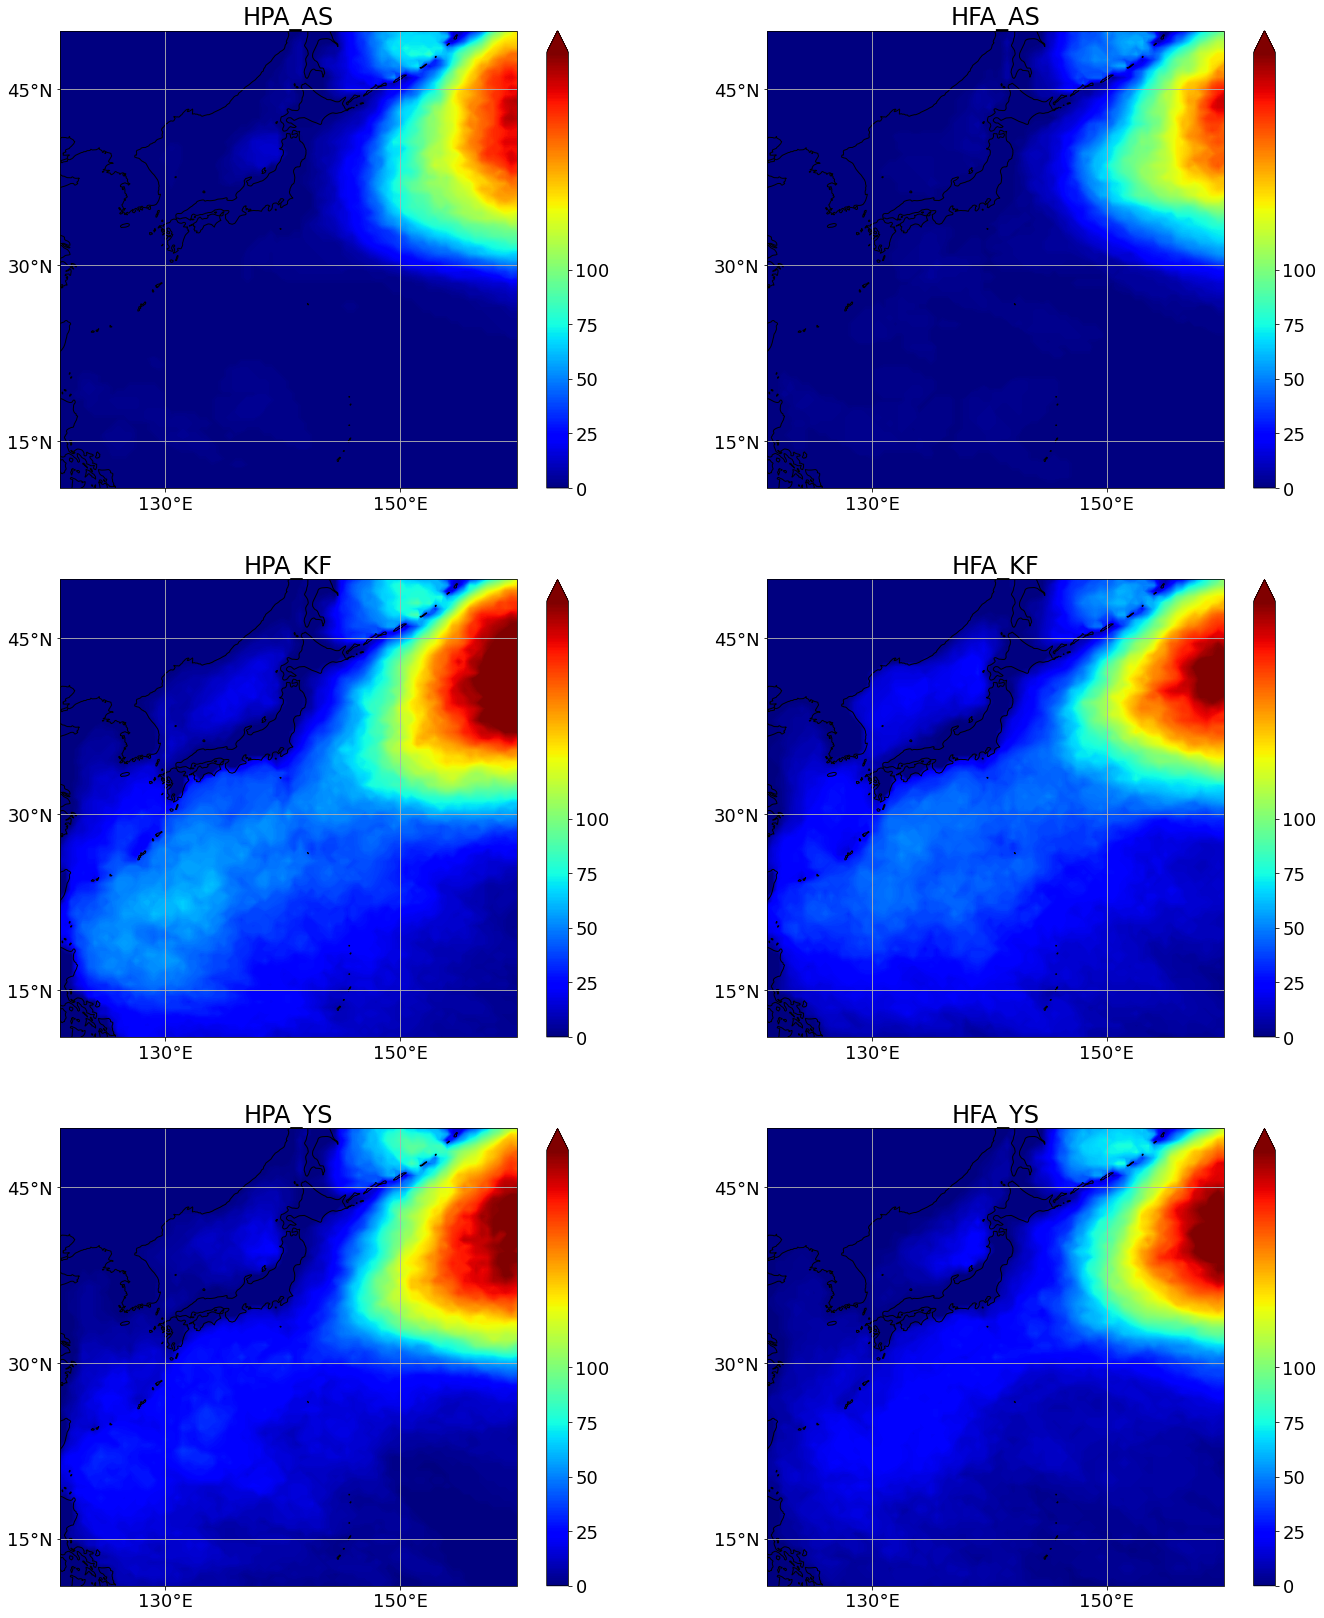

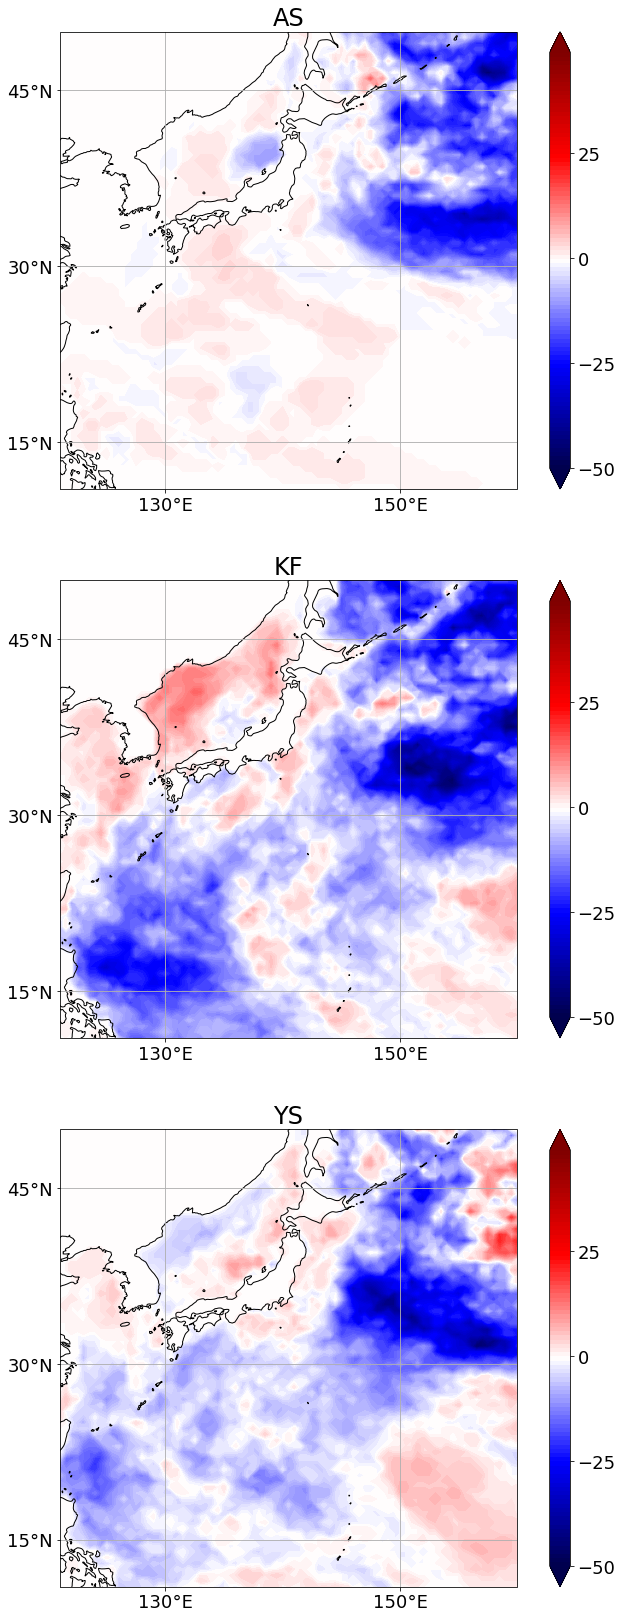

<ipython-input-2-160c85bd0ce2>:120: RuntimeWarning: divide by zero encountered in true_divide
  a = plt.contourf(lons, lats, F[i] * 100 / P[i], levels=levels, transform=ccrs.PlateCarree(), cmap=cmap, extend='both')
<ipython-input-2-160c85bd0ce2>:120: RuntimeWarning: invalid value encountered in true_divide
  a = plt.contourf(lons, lats, F[i] * 100 / P[i], levels=levels, transform=ccrs.PlateCarree(), cmap=cmap, extend='both')


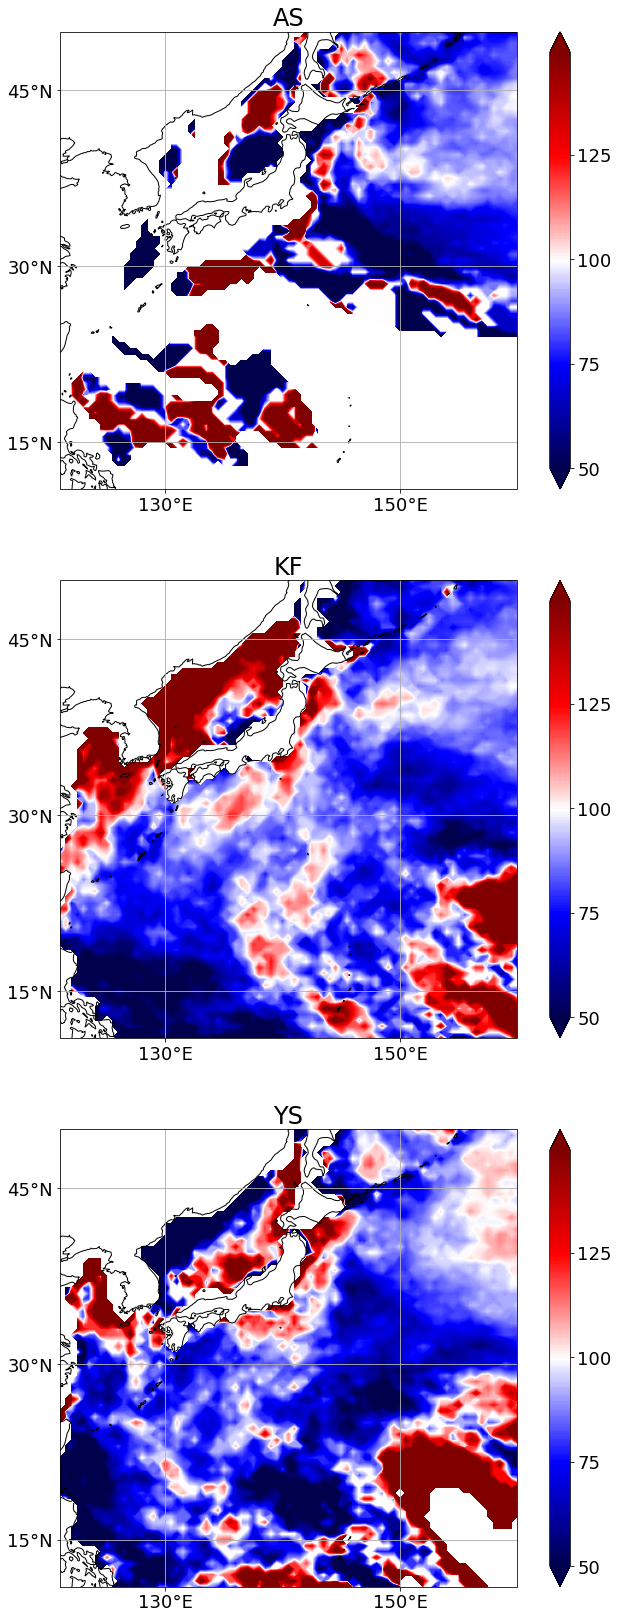

In [2]:
"""
POT数の変化を描画
"""

import cartopy.crs as ccrs
import csv
from csv import reader
import numpy as np
import matplotlib.pyplot as plt
import copy
import matplotlib as mpl
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as ticker

def read_pot_cnt(path):
    with open(path, 'r') as csv_file:
        res = list(csv.reader(csv_file))
    # POTの読み込み
    pot_count = np.zeros((79, 79))
    for i in range(len(res)):
        pot_count[i // 79][i % 79] = len(res[i])

    return pot_count
    
# 緯度経度の設定
with open('../lats.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    lats = list(csv_reader)
with open('../lons.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    lons = list(csv_reader)

for i in range(79):
    for j in range(79):
        lats[i][j] = float(lats[i][j])
        lons[i][j] = float(lons[i][j])

lat_s = lats[0][0]
lat_n = lats[0][-1]
lon_w = lons[0][0]
lon_e = lons[-1][0]

MODEL = ['HPA_AS', 'HPA_KF', 'HPA_YS', 'HFA_AS_c0', 'HFA_KF_c0', 'HFA_YS_c0']
p_as = read_pot_cnt('../pot_csv(100)(thr=8)/HPA_AS_POT_DATA.csv')
p_kf = read_pot_cnt('../pot_csv(100)(thr=8)/HPA_KF_POT_DATA.csv')
p_ys = read_pot_cnt('../pot_csv(100)(thr=8)/HPA_YS_POT_DATA.csv')
f_as = read_pot_cnt('../pot_csv(100)(thr=8)/HFA_AS_c0_POT_DATA.csv')
f_kf = read_pot_cnt('../pot_csv(100)(thr=8)/HFA_KF_c0_POT_DATA.csv')
f_ys = read_pot_cnt('../pot_csv(100)(thr=8)/HFA_YS_c0_POT_DATA.csv')


P = [p_as, p_kf, p_ys]
F = [f_as, f_kf, f_ys]
MODEL = ['AS', 'KF', 'YS']

# 現在気候・将来気候のPOT contour
fig = plt.figure(figsize=(20, 24))
levels = np.arange(0, 200, 0.5)
for i in range(6):
    ax = fig.add_subplot(3, 2, i + 1, projection=ccrs.PlateCarree())
    if i % 2 == 0:
        a = plt.contourf(lons, lats, P[i // 2], levels=levels, transform=ccrs.PlateCarree(), cmap='jet', extend='max')
    else:
        a = plt.contourf(lons, lats, F[i // 2], levels=levels, transform=ccrs.PlateCarree(), cmap='jet', extend='max')
    if i % 2 == 0:
        ax.set_title('HPA_' + MODEL[i // 2], fontsize=24)
    else:
        ax.set_title('HFA_' + MODEL[i // 2], fontsize=24)
    c_bar = plt.colorbar(a, ticks=[0, 25, 50, 75, 100])
    c_bar.ax.tick_params(labelsize=18)
    ax.set_xticks([130,150], crs=ccrs.PlateCarree()) # gridを引く経度を指定 360にすると0Wが出ない
    ax.set_yticks([15, 30, 45], crs=ccrs.PlateCarree()) # gridを引く緯度を指定
    lon_formatter = LongitudeFormatter(zero_direction_label=True) # 経度
    lat_formatter = LatitudeFormatter() # 緯度。formatを指定することも可能
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.axes.tick_params(labelsize=18)
    ax.grid()
    ax.coastlines()
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, alpha=0.5) # 経度線・緯度線ラベルを無効
    gl.xlocator = ticker.FixedLocator([130, 150]) # 経度線
    gl.ylocator = ticker.FixedLocator([15, 30, 45]) # 緯度線
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)
plt.savefig("../img(100)(thr=8)/pot_data.png")
plt.show()

# 描画(将来気候と現在気候のPOT数の差)
fig = plt.figure(figsize=(10, 24))
levels = np.arange(-50, 50, 1)
cmap = copy.copy(mpl.cm.get_cmap("seismic"))
for i in range(3):
    ax = fig.add_subplot(3, 1, i + 1, projection=ccrs.PlateCarree())
    a = plt.contourf(lons, lats, F[i] - P[i], levels=levels, transform=ccrs.PlateCarree(), cmap=cmap, extend='both')
    c_bar = plt.colorbar(a, ticks=[-50, -25, 0, 25, 50])
    c_bar.ax.tick_params(labelsize=18)
    c_bar.ax.yaxis.set_minor_locator(ticker.NullLocator())
    ax.set_xticks([130,150], crs=ccrs.PlateCarree()) # gridを引く経度を指定 360にすると0Wが出ない
    ax.set_yticks([15, 30, 45], crs=ccrs.PlateCarree()) # gridを引く緯度を指定
    lon_formatter = LongitudeFormatter(zero_direction_label=True) # 経度
    lat_formatter = LatitudeFormatter() # 緯度。formatを指定することも可能
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.axes.tick_params(labelsize=18)
    ax.grid()
    ax.coastlines()
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, alpha=0.5) # 経度線・緯度線ラベルを無効
    gl.xlocator = ticker.FixedLocator([130, 150]) # 経度線
    gl.ylocator = ticker.FixedLocator([15, 30, 45]) # 緯度線
    ax.set_title(MODEL[i], fontsize=24)
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)
plt.savefig("../img(100)(thr=8)/diff_of_pot_data.png")
plt.show()

# 描画(将来気候と現在気候のPOT数割合の差)
fig = plt.figure(figsize=(10, 24))
levels = np.arange(50, 150, 0.5)
cmap = copy.copy(mpl.cm.get_cmap("seismic"))
for i in range(3):
    ax = fig.add_subplot(3, 1, i + 1, projection=ccrs.PlateCarree())
    a = plt.contourf(lons, lats, F[i] * 100 / P[i], levels=levels, transform=ccrs.PlateCarree(), cmap=cmap, extend='both')
    c_bar = plt.colorbar(a, ticks=[50, 75, 100, 125, 150])
    c_bar.ax.tick_params(labelsize=18)
    c_bar.ax.yaxis.set_minor_locator(ticker.NullLocator())
    ax.set_xticks([130,150], crs=ccrs.PlateCarree()) # gridを引く経度を指定 360にすると0Wが出ない
    ax.set_yticks([15, 30, 45], crs=ccrs.PlateCarree()) # gridを引く緯度を指定
    lon_formatter = LongitudeFormatter(zero_direction_label=True) # 経度
    lat_formatter = LatitudeFormatter() # 緯度。formatを指定することも可能
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.axes.tick_params(labelsize=18)
    ax.grid()
    ax.coastlines()
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, alpha=0.5) # 経度線・緯度線ラベルを無効
    gl.xlocator = ticker.FixedLocator([130, 150]) # 経度線
    gl.ylocator = ticker.FixedLocator([15, 30, 45]) # 緯度線
    ax.set_title(MODEL[i], fontsize=24)
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)
plt.savefig("../img(100)(thr=8)/ratio_of_pot_data.png")
plt.show()